In [1]:
%pylab inline
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#latency / reliability tests
f = open("testRes15.json")
dataJ = f.read()
f.close()
# test time: 36644683.13000002ms

In [3]:
#hours
36644683 / 1000 / 60 / 60

10.17907861111111

In [4]:
#minutes
0.18 * 60

10.799999999999999

In [5]:
import json
data = np.array(json.loads(dataJ))
data.shape

(173422, 5)

In [6]:
figsize(10,10)
import seaborn as sns


In [7]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import pandas as pd
plt.rcParams['font.family'] = 'serif'
plt.rcParams['ytick.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['axes.labelsize'] = 35


In [8]:
pdata = pd.DataFrame(data=data, columns=['oscs','depth','compile','tree', 'eval'])

In [9]:
pdata

,oscs,depth,compile,tree,eval
0,91.0,10.0,19.870,1.845,1.670
1,35.0,8.0,8.185,0.040,2.230
2,101.0,10.0,8.810,0.230,1.510
3,103.0,10.0,11.630,0.345,1.660
4,110.0,10.0,9.145,0.230,1.225
5,88.0,9.0,7.060,0.235,1.280
6,1.0,0.0,0.755,0.025,1.580
7,69.0,10.0,5.740,0.160,0.970
8,41.0,8.0,1.970,0.130,0.845
9,112.0,10.0,6.665,0.265,1.465


In [10]:
#cut outliers
zmax = 20
pdata = pdata[((np.abs(stats.zscore(pdata['compile'])) < zmax) & (np.abs(stats.zscore(pdata['tree'])) < zmax) & (np.abs(stats.zscore(pdata['eval'])) < zmax))]

In [11]:
pdata.count()

oscs       173410
depth      173410
compile    173410
tree       173410
eval       173410
dtype: int64

In [12]:
#% non-outliers
173410/173422 * 100

99.9930804626864

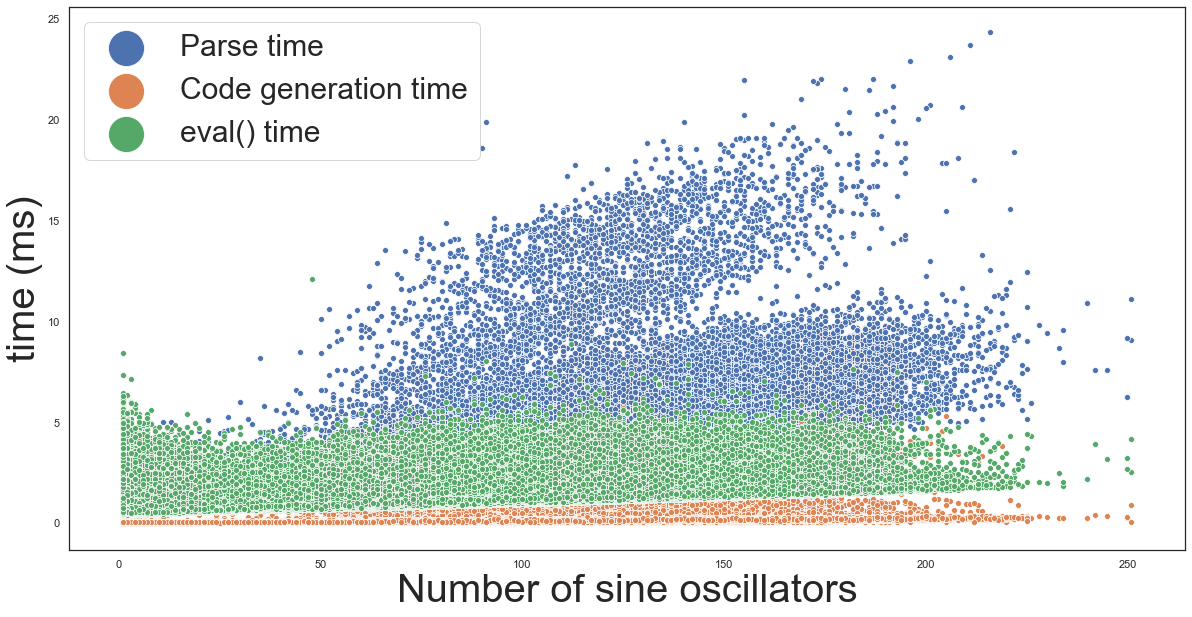

In [302]:
figsize(20,10)
sns.scatterplot(data=pdata, x='oscs', y='compile', label='Parse time')
sns.scatterplot(data=pdata, x='oscs', y='tree', label='Code generation time')
sns.scatterplot(data=pdata, x='oscs', y='eval', label='eval() time')

plt.xlabel("Number of sine oscillators", fontsize=40)
plt.ylabel("time (ms)", fontsize=40)
plt.yscale('linear')

plt.legend(fontsize=30, markerscale=6)
plt.savefig('latencytestAll.pdf', bbox_inches='tight')

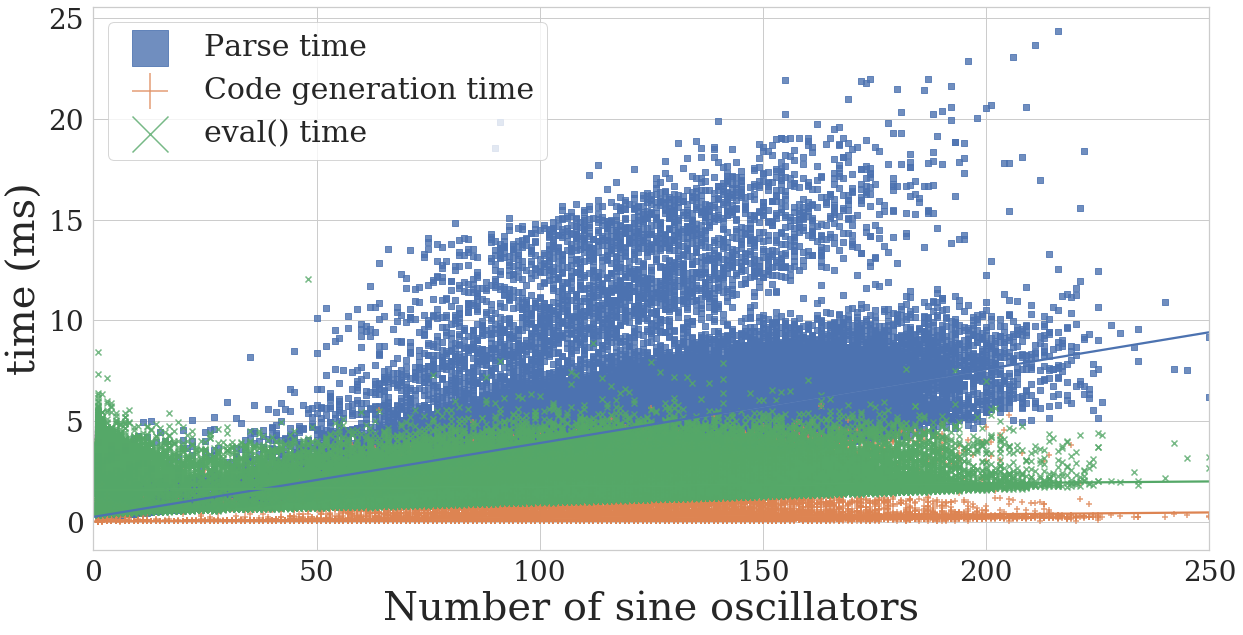

In [311]:
figsize(20,10)
sns.regplot(data=pdata, x='oscs', y='compile', order=1, marker='s', label='Parse time')
sns.regplot(data=pdata, x='oscs', y='tree', order=1, marker='+', label='Code generation time')
sns.regplot(data=pdata, x='oscs', y='eval', order=1, marker='x', label='eval() time')
plt.legend()
plt.xlim(0,250)
plt.xlabel("Number of sine oscillators", fontsize=40)
plt.ylabel("time (ms)", fontsize=40)
plt.yscale('linear')

plt.legend(fontsize=30, markerscale=6)
plt.savefig('latencytestRegAll.pdf', bbox_inches='tight')

In [280]:
totalTime = np.sum(data[:,2:5], axis=1)

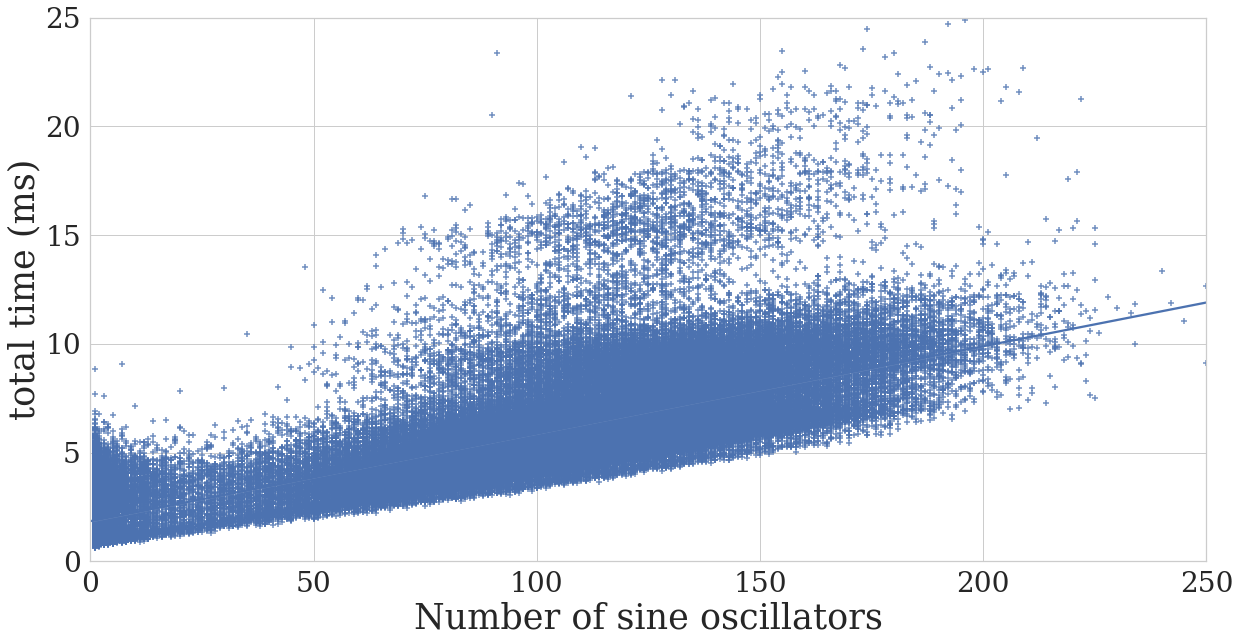

In [310]:
figsize(20,10)
sns.regplot(data[:,0], totalTime, order=1, marker='+')
# plt.ylim(0,30)
plt.xlim(0,250)
plt.xlabel("Number of sine oscillators")
plt.ylabel("total time (ms)")
plt.yscale('linear')
plt.ylim(0,25)
plt.savefig('latencytestRegTotal.pdf', bbox_inches='tight')

In [196]:
#load test
# 3615945.390000008ms

In [336]:
3615945/1000/60

60.265750000000004

In [312]:
f = open("testRes13.json")
dataJ = f.read()
f.close()

In [313]:
import json
data = np.array(json.loads(dataJ))
data.shape

(14001, 5)

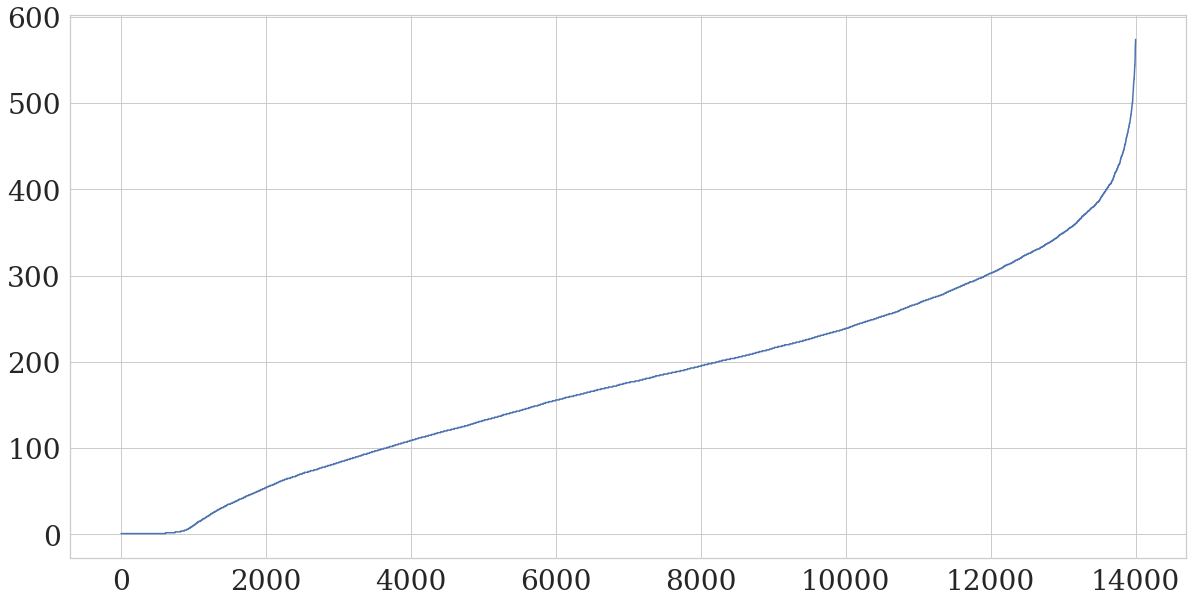

In [314]:
plot(sort(data[:,0]))

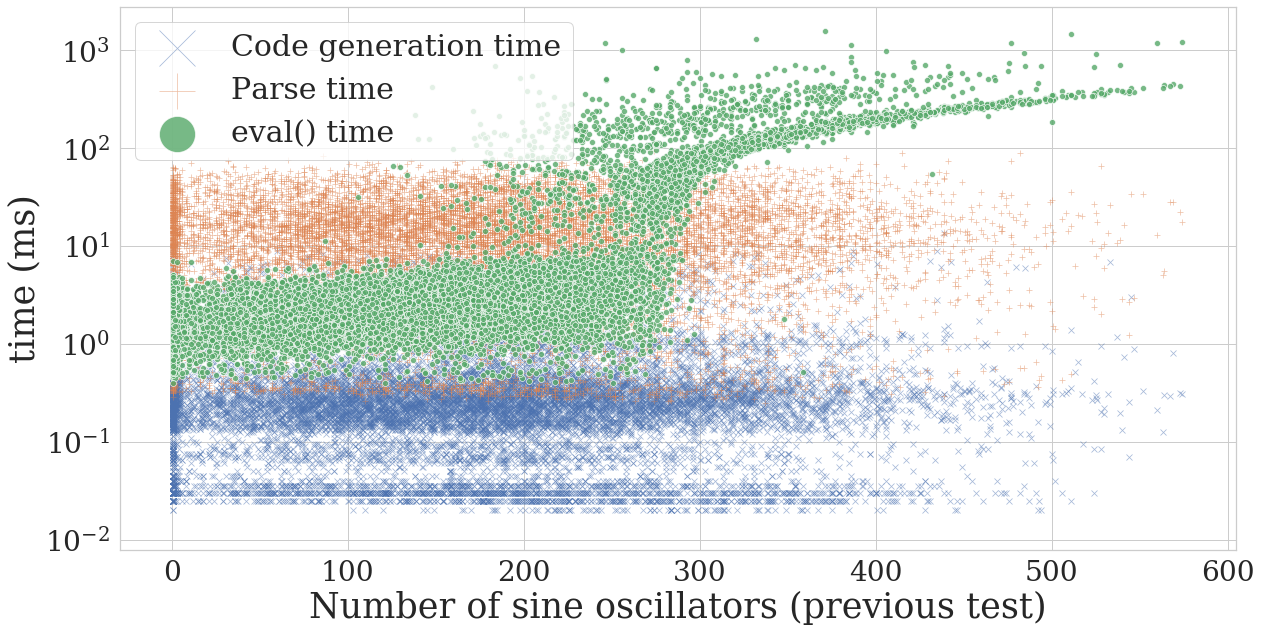

In [339]:
figsize(20,10)
sns.scatterplot(x=data[:-1,0],y=data[1:,3], alpha=0.5, label='Code generation time', marker='x')
sns.scatterplot(x=data[:-1,0],y=data[1:,2], alpha=0.5, label='Parse time', marker='+')
sns.scatterplot(x=data[:-1,0],y=data[1:,4], alpha=0.8, label='eval() time')
plt.xlabel("Number of sine oscillators (previous test)")
plt.ylabel("time (ms)")
plt.yscale('log')

plt.legend(fontsize=30, markerscale=6)
plt.savefig('loadtest.png', bbox_inches='tight')